In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=.25, random_state=0)

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

val. score: 0.9881217520415738
test score: 0.9888888888888889


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram

from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# pipeline class is used as estimator to enable
pipe = Pipeline([
    ('model', SVC())
])

linsvc_search = {
    'model': [LinearSVC(max_iter=1000)],
    'model__C': (1e-6, 1e+6, 'log-uniform'),
}

svc_search = {
    'model': [SVC()],
    'model__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'model__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'model__degree': Integer(1,8),
    'model__kernel': Categorical(['linear', 'poly', 'rbf']),
}

opt = BayesSearchCV(
    pipe,
    # (parameter space, # of evaluations)
    [(svc_search, 40), (linsvc_search, 10)],
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

val. score: 0.991833704528582
test score: 0.9933333333333333
best params: OrderedDict([('model', SVC(C=46617.22764368871, degree=4, gamma=0.0006669303166373686)), ('model__C', 46617.22764368871), ('model__degree', 4), ('model__gamma', 0.0006669303166373686), ('model__kernel', 'rbf')])


In [ ]:
X_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [ ]:
X_train.shape

(1347, 64)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

opt = BayesSearchCV(
    GradientBoostingClassifier(),
    {
        'learning_rate':Real(1e-3,1e-2,'log-uniform'),
        'n_estimators':[100,200,300,400,500],
        'max_depth':Integer(3,5),
        'criterion':Categorical(['friedman_mse','squared_error'])
    },
    n_iter=10,
    cv=5
)
opt.fit(X_train,y_train)
print(opt.best_params_)

OrderedDict([('criterion', 'friedman_mse'), ('learning_rate', 0.0069367076662194965), ('max_depth', 4), ('n_estimators', 200)])


In [23]:
opt.optimizer_results_[0]

          fun: -0.912405342145119
            x: ['friedman_mse', 0.0069367076662194965, 4, 200]
    func_vals: [-9.124e-01 -8.916e-01 -9.102e-01 -9.065e-01 -8.701e-01
                -8.901e-01 -8.590e-01 -8.938e-01 -8.864e-01 -8.924e-01]
      x_iters: [['friedman_mse', 0.0069367076662194965, 4, 200], ['friedman_mse', 0.0020454263890879033, 3, 400], ['squared_error', 0.0032623634531509563, 4, 400], ['friedman_mse', 0.005092272829906793, 3, 200], ['squared_error', 0.001448728707443486, 4, 200], ['squared_error', 0.004137861429703645, 3, 200], ['friedman_mse', 0.0010159929727046211, 4, 200], ['squared_error', 0.002240127461029502, 4, 300], ['friedman_mse', 0.0014147514516814478, 4, 400], ['friedman_mse', 0.0018292279845645554, 4, 400]]
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                                        n_restarts_optimizer=2, noise='gaussian',
                                        norma

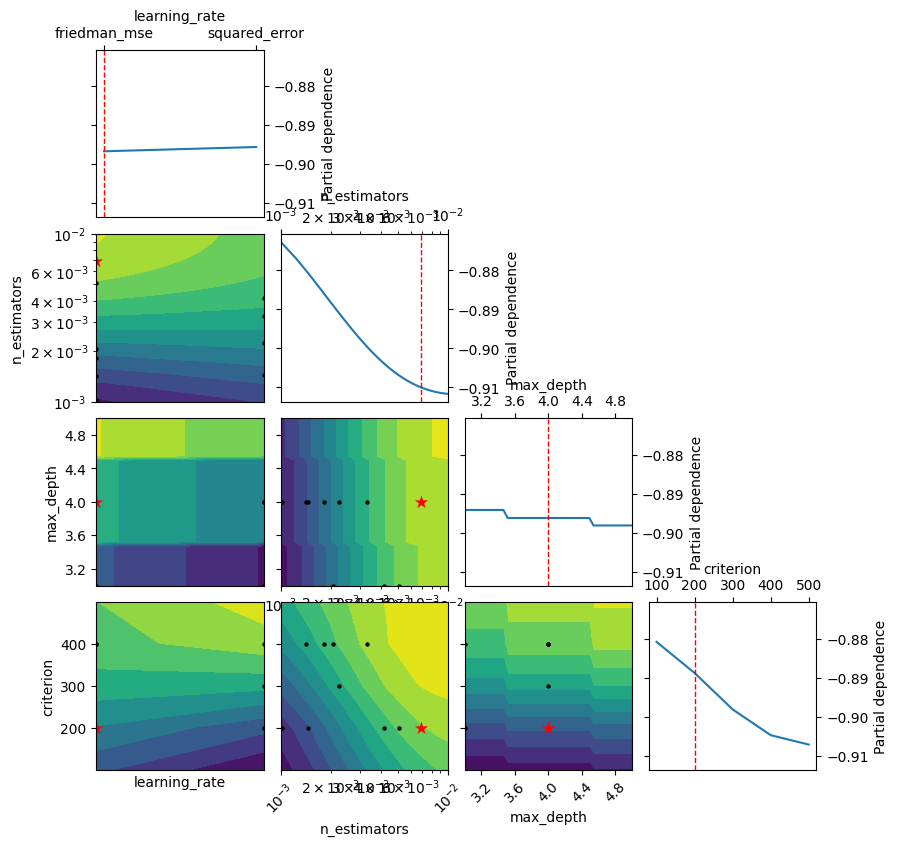

In [26]:
import matplotlib.pyplot as plt
_=plot_objective(opt.optimizer_results_[0],dimensions=['learning_rate','n_estimators','max_depth','criterion'])
plt.show()

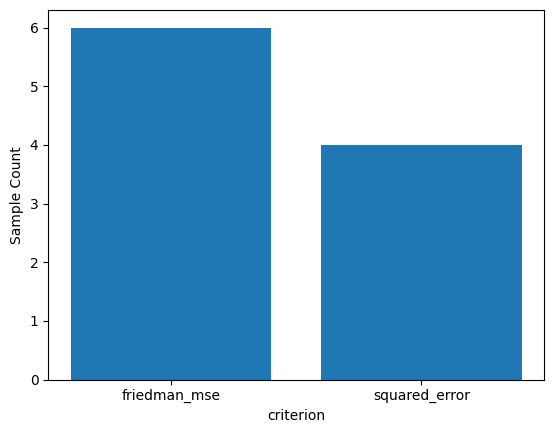

In [30]:
_=plot_histogram(opt.optimizer_results_[0],0)
plt.show()

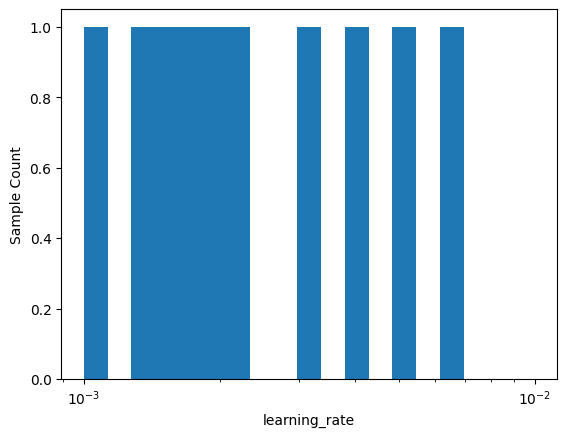

In [31]:
_=plot_histogram(opt.optimizer_results_[0],1)
plt.show()

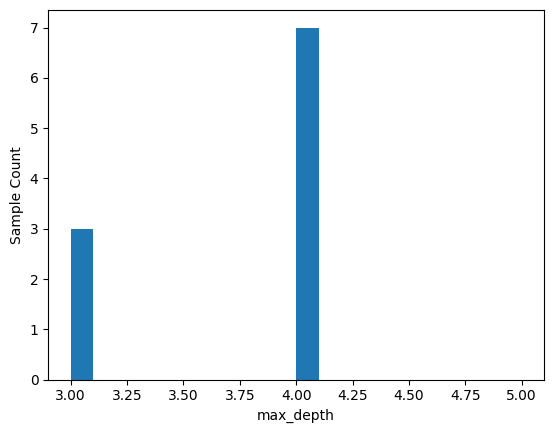

In [32]:
_=plot_histogram(opt.optimizer_results_[0],2)
plt.show()

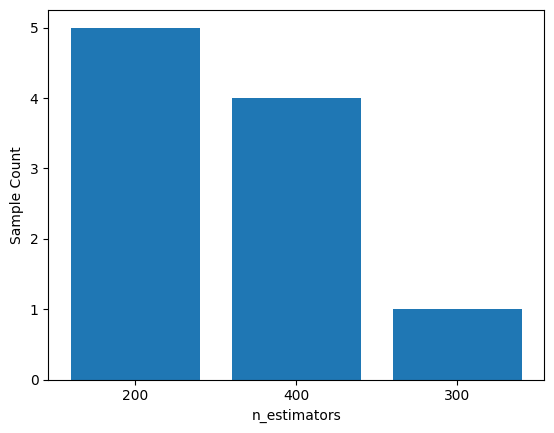

In [33]:
_=plot_histogram(opt.optimizer_results_[0],3)
plt.show()